<a href="https://colab.research.google.com/github/Deem-KSU/IT326-Group1-56546/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

path = 'student_depression_dataset.csv'
raw_dataset = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,
  "adilshamim8/student-depression-dataset", path)

Using Colab cache for faster access to the 'student-depression-dataset' dataset.


#### 1. Data Analysis:


*   Statical analysis:

Five-Number Summary (Minimum, Q1, Median, Q3, Maximum):


In [14]:
print ('1. Age attribute:\n\n''Minimum:', raw_dataset['Age'].min(), ' \nQ1:', raw_dataset['Age'].quantile(0.25), ' \nMedian:', raw_dataset['Age'].median(), ' \nQ3:', raw_dataset['Age'].quantile(0.75), ' \nMaximum:', raw_dataset['Age'].max())
print ('\n\n2. Academic Pressure attribute:\n\n''Minimum:', raw_dataset['Academic Pressure'].min(), ' \nQ1:', raw_dataset['Academic Pressure'].quantile(0.25), ' \nMedian:', raw_dataset['Academic Pressure'].median(), ' \nQ3:', raw_dataset['Academic Pressure'].quantile(0.75), ' \nMaximum:', raw_dataset['Academic Pressure'].max())
print ('\n\n3. Work Pressure attribute:\n\n''Minimum:', raw_dataset['Work Pressure'].min(), ' \nQ1:', raw_dataset['Work Pressure'].quantile(0.25), ' \nMedian:', raw_dataset['Work Pressure'].median(), ' \nQ3:', raw_dataset['Work Pressure'].quantile(0.75), ' \nMaximum:', raw_dataset['Work Pressure'].max())
print ('\n\n4.CGPA attribute:\n\n''Minimum:', raw_dataset['CGPA'].min(), ' \nQ1:', raw_dataset['CGPA'].quantile(0.25), ' \nMedian:', raw_dataset['CGPA'].median(), ' \nQ3:', raw_dataset['CGPA'].quantile(0.75), ' \nMaximum:', raw_dataset['CGPA'].max())
print ('\n\n5.Study Satisfaction attribute:\n\n''Minimum:', raw_dataset['Study Satisfaction'].min(), ' \nQ1:', raw_dataset['Study Satisfaction'].quantile(0.25), ' \nMedian:', raw_dataset['Study Satisfaction'].median(), ' \nQ3:', raw_dataset['Study Satisfaction'].quantile(0.75), ' \nMaximum:', raw_dataset['Study Satisfaction'].max())
print ('\n\n6.Job Satisfaction attribute:\n\n''Minimum:', raw_dataset['Job Satisfaction'].min(), ' \nQ1:', raw_dataset['Job Satisfaction'].quantile(0.25), ' \nMedian:', raw_dataset['Job Satisfaction'].median(), ' \nQ3:', raw_dataset['Job Satisfaction'].quantile(0.75), ' \nMaximum:', raw_dataset['Job Satisfaction'].max())

#Financial Stress column is defined as object so we need to convert it to numeric first
raw_dataset['Financial Stress'] = pd.to_numeric(raw_dataset['Financial Stress'], errors='coerce')
raw_dataset.dropna(subset=['Financial Stress'], inplace=True)

print ('\n\n7.Financial Stress attribute:\n\n''Minimum:', raw_dataset['Financial Stress'].min(), ' \nQ1:', raw_dataset['Financial Stress'].quantile(0.25), ' \nMedian:', raw_dataset['Financial Stress'].median(), ' \nQ3:', raw_dataset['Financial Stress'].quantile(0.75), ' \nMaximum:', raw_dataset['Financial Stress'].max())



1. Age attribute:

Minimum: 18.0  
Q1: 21.0  
Median: 25.0  
Q3: 30.0  
Maximum: 59.0


2. Academic Pressure attribute:

Minimum: 0.0  
Q1: 2.0  
Median: 3.0  
Q3: 4.0  
Maximum: 5.0


3. Work Pressure attribute:

Minimum: 0.0  
Q1: 0.0  
Median: 0.0  
Q3: 0.0  
Maximum: 5.0


4.CGPA attribute:

Minimum: 0.0  
Q1: 6.29  
Median: 7.77  
Q3: 8.92  
Maximum: 10.0


5.Study Satisfaction attribute:

Minimum: 0.0  
Q1: 2.0  
Median: 3.0  
Q3: 4.0  
Maximum: 5.0


6.Job Satisfaction attribute:

Minimum: 0.0  
Q1: 0.0  
Median: 0.0  
Q3: 0.0  
Maximum: 4.0


7.Financial Stress attribute:

Minimum: 1.0  
Q1: 2.0  
Median: 3.0  
Q3: 4.0  
Maximum: 5.0


Outliers:

In [60]:
import numpy as np

# Select only numeric columns
numeric_cols = raw_dataset[['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress' ]]

outliers = {}
for col in numeric_cols.columns:
    mean = np.mean(numeric_cols[col])
    std = np.std(numeric_cols[col])
    col_outliers = numeric_cols[col][abs(numeric_cols[col]-mean) > 3 * std]
    outliers[col] = col_outliers.tolist()

print("Outliers in each numeric column:\n")
for col, outlier_list in outliers.items():
    print(f"{col}: {len(outlier_list)} outliers")

Outliers in each numeric column:

Age: 19 outliers
Academic Pressure: 0 outliers
Work Pressure: 3 outliers
CGPA: 9 outliers
Study Satisfaction: 0 outliers
Job Satisfaction: 8 outliers
Financial Stress: 0 outliers


In [61]:
from scipy.stats import zscore
import numpy as np

numeric = raw_dataset[['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress' ]].copy() # Use .copy() to avoid SettingWithCopyWarning
z_scores = numeric.apply(zscore)

outliers = {}
for col in z_scores.columns:
    col_outliers = numeric[z_scores[col].abs() > 3][col]
    outliers[col] = col_outliers.tolist()

print('Outliers Number:', outliers)

Outliers Number: {'Age': [42.0, 58.0, 49.0, 51.0, 44.0, 43.0, 46.0, 59.0, 42.0, 54.0, 48.0, 56.0, 43.0, 46.0, 42.0, 42.0, 48.0, 41.0, 48.0], 'Academic Pressure': [], 'Work Pressure': [5.0, 2.0, 5.0], 'CGPA': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Study Satisfaction': [], 'Job Satisfaction': [3.0, 4.0, 2.0, 1.0, 1.0, 2.0, 4.0, 2.0], 'Financial Stress': []}


Boxplots:

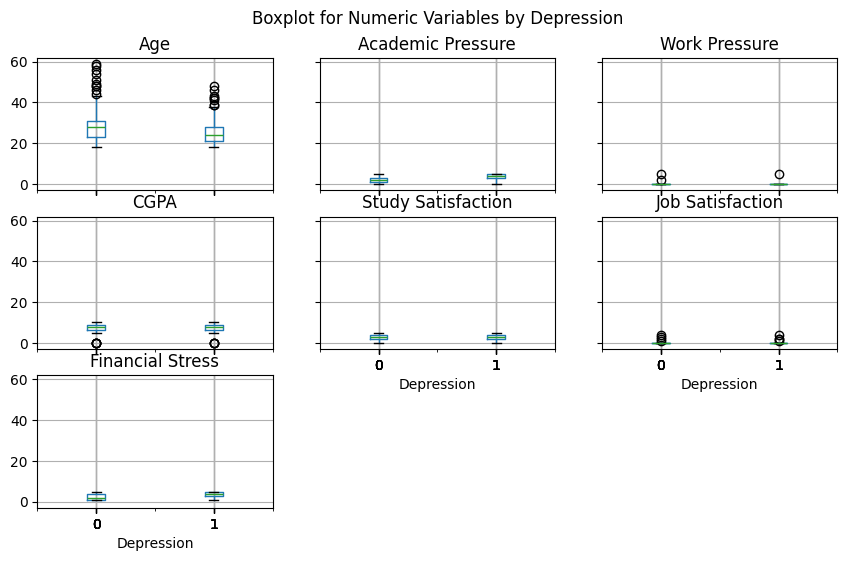

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

raw_dataset.boxplot(column=['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress' ], by='Depression', figsize=(10,6))
plt.suptitle('Boxplot for Numeric Variables by Depression')
plt.show()